In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Python 3.5

# Центральная предельная теорема своими руками

## Непрерывная случайная величина

Я использую случайную величину, которая описывается экспоненциальным распределением: 
$f_{X}(x)={\begin{cases}\lambda \,e^{{-\lambda x}},&x\geq 0,\\0,&x<0.\end{cases}}.$

In [61]:
#Сгенерируем случайную величину: lamba = 0.5
rv = sts.expon(scale = 2)

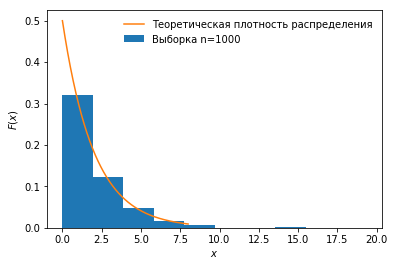

In [3]:
#Теперь сгенерирует выборку объемом n=1000, построим ее гистограмму и теоритическую плотность распределения
sample = rv.rvs(1000)

x = np.linspace(0,8, 1000)
pdf = rv.pdf(x)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

plt.hist(sample, normed=True, label='Выборка n=1000')
plt.plot(x, pdf, label='Теоретическая плотность распределения')
plt.legend(loc='best', frameon=False)

## Апроксимация выборочного среднего

Теперь сгенериуем 1000 выборок трех разных объемов (n = 5, 10, 50), построим гистограммы выборочных средних каждой выборки и посмотрим, насколько точно можно апроксимировать эту величину в зависимости от объема выборки. По ЦПТ выборочное среднее описывается нормальным распределением


In [4]:
#функция подсчета выборочного среднего
def calculate_mean(set):
    summa = 0
    for count, i in enumerate(set):
        summa += i
    return summa/count

In [43]:
#записывать выборочные средние будем в список
rv_mean = []

n = 5

#сделаем 1000 выборок размера 5, подсчитаем выборочное среднее и добавим его в список средних
for k in range(1000):
    sample = rv.rvs(n)
    rv_mean.append(calculate_mean(sample))

Теперь расчитаем параметры апроксимирующего нормального распределения. Т.к. в данном примере экспоненциального распределения $\lambda = 1/2$ то мат. ожидание $\mu$=2, а дисперсия $D = 4$. Тогда апроксимирующее нормальное распределение будет иметь параметры $\mu$ = 2, дисперсия $D$ = 4/n, а средневкадратичное отклонение $\sigma = \sqrt{4/n}$

In [48]:
approx_norm = sts.norm(loc=2, scale=np.sqrt(4/n))
x = np.linspace(0, 4, 1000)
appox_pdf = approx_norm.pdf(x)

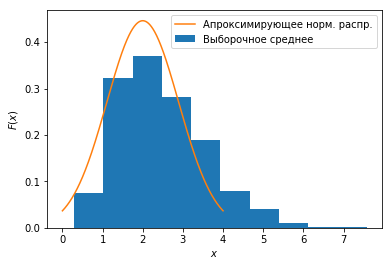

In [54]:
plt.hist(rv_mean, normed=True, label='Выборочное среднее')
plt.plot(x, appox_pdf, label='Апроксимирующее норм. распр.')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.legend(loc='best')
plt.autoscale(enable=True, axis='both', tight=None)

Повторим все то же для n = 10 и 50

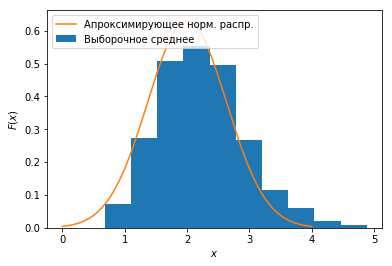

In [60]:
rv_mean = []
n = 10
for k in range(1000):
    sample = rv.rvs(n)
    rv_mean.append(calculate_mean(sample))
approx_norm = sts.norm(loc=2, scale=np.sqrt(4/n))
x = np.linspace(0, 4, 1000)
appox_pdf = approx_norm.pdf(x)
plt.hist(rv_mean, normed=True, label='Выборочное среднее')
plt.plot(x, appox_pdf, label='Апроксимирующее норм. распр.')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.legend(loc='upper left')
plt.autoscale(enable=True, axis='both', tight=None)

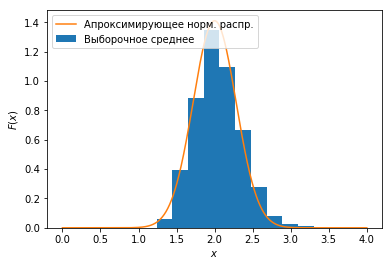

In [59]:
rv_mean = []
n = 50
for k in range(1000):
    sample = rv.rvs(n)
    rv_mean.append(calculate_mean(sample))
approx_norm = sts.norm(loc=2, scale=np.sqrt(4/n))
x = np.linspace(0, 4, 1000)
appox_pdf = approx_norm.pdf(x)
plt.hist(rv_mean, normed=True, label='Выборочное среднее')
plt.plot(x, appox_pdf, label='Апроксимирующее норм. распр.')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.legend(loc='upper left')
plt.autoscale(enable=True, axis='both', tight=None)

## Вывод
Из гистограмм и графиков видно, что чем больше случайные выборки, тем точнее набор выборочных средних, взятых по таким выборкам, можно описать нормальным распределением. Это соответствует Центральной предельной теореме.